In [1]:
# Library to import
import numpy as np
import scipy.interpolate as e
import matplotlib.pyplot as plt
import math
import os
import sys

In [2]:
# Data loading
r_data, q_data = np.loadtxt('q_structure.txt', comments='%', unpack=True)
q_data *= 0.5  # Scale the source term

# Interpolate q(r) for use on the grid
q_interp = e.interp1d(r_data, q_data, fill_value="extrapolate")

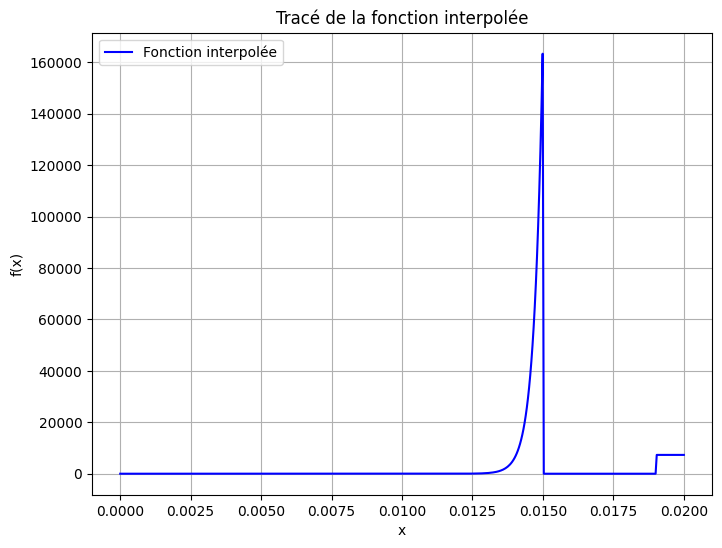

In [3]:
# Unit test merci louis =)

x_min = 0
x_max = 0.02
num_points = 500

# Générer des points d'échantillonnage
x_dense = np.linspace(x_min, x_max, num_points)
y_dense = q_interp(x_dense)
   
# Tracer la fonction
plt.figure(figsize=(8, 6))
plt.plot(x_dense, y_dense, label="Fonction interpolée", color="blue")
plt.title("Tracé de la fonction interpolée")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

# 1. Case Study <a class="anchor" id="1"></a>

## 1.1 General Condition <a class="anchor" id="1.1"></a>

<div style="text-align: center;">
    <img src="Figure/Figure1.png" style="max-width: 850px; display: inline;" alt="Studied Network" />
</div>


In [4]:
def return_moy(r_1, r_2):
    """
    Return the average radius, i.e., r_(i+1/2) or r_(i-1/2).
    Return also the average heat conductivity i.e. k_(i+1/2) or k_(i-1/2).

    Parameters:
    r_1 (float): The first radius (e.g., r_i or r_{i-1} or k).
    r_2 (float): The second radius (e.g., r_{i+1} or r_i or).
    

    Returns:
    float: The average radius.
    """
    return (r_1 + r_2) / 2

def return_surface(r):
    """
    Return the surface for a specific radius.
    
    The surface is calculated as:
        Surface = 2 * pi * r
    
    Parameters:
    r (float): The radius at a specific point (e.g., r_i, r_{i+1/2}, r_{i-1/2}).

    Returns:
    float: The computed surface.
    """
    return 2 * math.pi * r

def return_volume(r_after, r_before):
    """
    Calculate the volume using the average of squared radii.

    Parameters:
    r_after (float): Radius after (e.g., r_i+1 or r_i).
    r_before (float): Radius before (e.g., r_i or r_i-1).

    Returns:
    float: The computed volume.
    """
    return math.pi * (r_after**2 - r_before**2)

In [5]:
import matplotlib.pyplot as plt
import os

def plot_temperature_vs_radius(r, T, save_path="Figure/temperature_vs_radius.png"):
    """
    Plots the temperature as a function of the radius and saves the plot to a file.

    Parameters:
    r (array): Array of radius values.
    T (array): Array of temperature values corresponding to the radius values.
    save_path (str): The path where the plot should be saved.
    """
    # Ensure the directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(r, T, label="Temperature (T)", color="red")
    plt.title("Temperature as a Function of Radius")
    plt.xlabel("Radius (r) [m]")
    plt.ylabel("Temperature (T) [°C]")
    plt.legend()
    plt.grid(True)
    
    # Save the figure
    plt.savefig(save_path)
    print(f"Figure saved as {save_path}")
    plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_temperature_map(r, T, cmap='coolwarm', colorbar_label="Temperature (°C)", title="Structure Temperature Color Map", save_path="Figure/heat_map_temperature.png"):
    """
    Plots a 2D temperature map with specified separating radii and annotations.
    
    Parameters:
    - r (1D array): Array of radial positions.
    - T (1D array): Array of temperature values corresponding to r.
    - separating_radii (list): List of radii to separate regions with dashed lines.
    - cmap (str): Colormap for the temperature plot (default: 'coolwarm').
    - colorbar_label (str): Label for the color bar.
    - title (str): Title for the plot.
    """
    
    # z (1D array): Array of axial positions (length along z-axis).
    z = np.linspace(0, 0.01, 100)  # Length in z, from 0 to 10 mm (100 points)
    
    # Define the radii separating the 3 regions
    separating_radii = [15e-3, 19e-3]  # 15 mm and 19 mm
    
    # Create a 2D matrix for the temperature (assume constant along z)
    T_2D = np.tile(T, (len(z), 1))
    
    # Find the min and max temperature values
    min_temp = np.min(T)
    max_temp = np.max(T)
    
    # Ensure the directory exists
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    
    # Plot the color map
    plt.figure(figsize=(8, 6))
    mesh = plt.pcolormesh(r, z, T_2D, shading='auto', cmap=cmap)
    
    # Add the color bar
    cbar = plt.colorbar(mesh, label=colorbar_label)
    
    # Add min and max values on the color bar
    cbar.ax.text(0.5, -0.05, f"{min_temp:.2f} °C", ha='center', va='center', transform=cbar.ax.transAxes, color='blue', fontsize=10)
    cbar.ax.text(0.5, 1.05, f"{max_temp:.2f} °C", ha='center', va='center', transform=cbar.ax.transAxes, color='red', fontsize=10)
    
    # Add dashed lines for the regions
    for radius in separating_radii:
        plt.axvline(x=radius, color='black', linestyle='--', linewidth=1.5, label=f'r = {radius:.3f} m')
    
    # Add labels and title
    plt.xlabel("Radius (m)")
    plt.ylabel("Length (m)")
    plt.title(title)
    plt.legend(loc='upper right')  # Legend for the separating lines
    plt.tight_layout()  # Adjust layout for text visibility
    plt.grid(True)
    
    # Save the figure
    plt.savefig(save_path)
    print(f"Figure saved as {save_path}")
    plt.show()

In [7]:
########################################################################
#                       constants values
########################################################################

k_core = 44.5    # W/mK
k_air = 0.05      # W/mK
k_coil = 400    # W/mK

cp_core = 3.537e6 # J /m^3·K
cp_air = 1230.125 # J /m^3·
cp_coil = 3.448e6 # J /m^3·

rho_core = 7860     # kg / m^3
rho_air = 1.225     # kg / m^3
rho_coil = 8944     # kg / m^3

T_amb = 20        # °C
h_air = 20        # W/m²·K

nodes_core = 4097 # number of nodes for core magnetic side (2^m + 1), with m an interger
nodes_air = 1024 # number of nodes for core magnetic side (2^p), with p an interger
nodes_coil = 256 # number of nodes for core magnetic side (2^q), with q an interger

n_tot = nodes_core + nodes_air + nodes_coil # notal number of nodes

length_core = 0.015 # thinkness of core magnetic part
length_air = 0.004 # thinkness of air part
length_coil = 0.001 # thinkness of coil part

total_length = length_core + length_air + length_coil # total length (in radial direction)

# Generate non-uniform mesh
r_core = np.linspace(0, length_core, nodes_core, endpoint=False)
r_air = np.linspace(length_core, length_core + length_air, nodes_air, endpoint=False)
r_coil = np.linspace(length_core + length_air, total_length, nodes_coil)
r = np.concatenate([r_core, r_air, r_coil])

k = np.zeros(n_tot) # matrix used to store every thermal conductivity

# Assign thermal conductivity per material
k[:nodes_core] = k_core
k[nodes_core:nodes_core+nodes_air] = k_air
k[nodes_core+nodes_air:n_tot] = k_coil

# Assign heat capacity per material
cp = np.zeros(n_tot) # matrix used to store every thermal conductivity

cp[:nodes_core] = cp_core
cp[nodes_core:nodes_core+nodes_air] = cp_air
cp[nodes_core+nodes_air:n_tot] = cp_coil

# Assign heat capacity per material
rho = np.zeros(n_tot) # matrix used to store every thermal conductivity

rho[:nodes_core] = rho_core
rho[nodes_core:nodes_core+nodes_air] = rho_air
rho[nodes_core+nodes_air:n_tot] = rho_coil

## 1.2 Steady State <a class="anchor" id="1.1"></a>

<div style="text-align: center;">
    <img src="Figure/Figure2.png" style="max-width: 850px; display: inline;" alt="Studied Network" />
</div>

In [8]:
# Interpolated source term
q = q_interp(r)

# creation of matrix
T = np.zeros(n_tot)  
b = np.zeros(n_tot)
A = np.zeros((n_tot,n_tot))

# Boundary condition 

#####################################################
# Neumman boundary condition dT/dr = 0 (no flux term)
#####################################################

##########################################################################
# Compute average radius i.e. r_(i+1/2) or r_(i-1/2)
# And also average heat conductivity i.e. r_(i+1/2) or r_(i-1/2)
##########################################################################

r0_plus_half = return_moy(r[0], r[1])
k0_plus_half = return_moy(k[0], k[1])

dr_plus_one = r[1] - r[0]
Si_plus_half = return_surface(r0_plus_half)

V0 = return_volume(r0_plus_half, 0) # half volume considered

A[0,0] = ( k0_plus_half * Si_plus_half ) / dr_plus_one
A[0,1] = - ( k0_plus_half * Si_plus_half ) / dr_plus_one

b[0] = q[0] * V0 # No external source term at the first node (due to zero flux)

#####################################################
# Fourier boundary condition -k(dT/dr) = h(T_f - T_n) 
#   with T_f, the ambiant air temperature
#   with h the convection air coefficient
#####################################################

##########################################################################
# Compute average radius i.e. r_(i-1/2)
# And also average heat conductivity i.e. k_(i-1/2)
##########################################################################

r_not_minus_half = return_moy(r[n_tot-2], r[n_tot-1])
ki_not_minus_half = return_moy(k[n_tot-2], k[n_tot-1])

##########################################################################
# Compute the 2 surface area to compute :
# S_i and S_{i-1/2}
##########################################################################

S_ntot_1 = return_surface(r[n_tot-1])  # Surface area for convection at the last node (outermost radius)
S_ntot_minus_half = return_surface(r_not_minus_half)  # Surface area for conduction between second-to-last and last node

##########################################################################
# Compute the volume : V_i 
##########################################################################

V_ntot = return_volume(r[n_tot-1], r_not_minus_half) # half of a volume is considered

##########################################################################
# Compute the three coefficient i.e. a_{i,i} and a_{i,i-1} 
# Compute also the source term coefficient i.e. b_{i}
##########################################################################

# Applying the Fourier boundary condition at the last node
dr_last = r[n_tot-1] - r[n_tot-2]  # Radial step for the last node
A[n_tot-1, n_tot-2] = - ( ki_not_minus_half / dr_last ) * S_ntot_minus_half 
A[n_tot-1, n_tot-1] = ( ki_not_minus_half / dr_last ) * S_ntot_minus_half + h_air * S_ntot_1 

# Source term due to convection at the last node
b[n_tot-1] = q[n_tot-1] * V_ntot + h_air * T_amb * S_ntot_1 # At boundary S{i+1/2} = S{i}

for i in range (1,n_tot-1):
    
    ######################################################################################
    # Compute average radius i.e. r_(i+1/2) or r_(i-1/2)
    # And also average heat conductivity i.e. r_(i+1/2) or r_(i-1/2)
    ######################################################################################
    
    ri_plus_half = return_moy(r[i], r[i+1])    
    ri_minus_half = return_moy(r[i-1], r[i])
    
    ki_plus_half = k[i+1]
    ki_minus_half = k[i]
    
    ######################################################################################
    # Compute the radial step (difference in radius) for neighboring nodes
    # dr_minus_one = r[i] - r[i-1] corresponds to the radial step between node i and i-1
    # dr_plus_one = r[i+1] - r[i] corresponds to the radial step between node i and i+1
    ######################################################################################

    dr_minus_one = r[i] - r[i-1]
    dr_plus_one = r[i+1] - r[i]
    
    ############################################################################################################
    # Compute the surface areas at the average radii:
    # Si_plus_half corresponds to the surface area at the average radius (r_(i+1/2)) between nodes i and i+1.
    # Si_minus_half corresponds to the surface area at the average radius (r_(i-1/2)) between nodes i-1 and i.
    ############################################################################################################

    Si_plus_half = return_surface(ri_plus_half)
    Si_minus_half = return_surface(ri_minus_half)

    ############################################################################################################
    # Compute the volumes at the average radii:
    # Vi corresponds to the volume between the average radii r_(i-1/2) and r_(i+1/2).
    ############################################################################################################

    Vi = return_volume(ri_plus_half, ri_minus_half)
        
    ##########################################################################
    # Compute the three coefficient i.e. a_{i,i-1} ; a_{i,i} and a_{i,i+1}
    # Compute also the source term coefficient i.e. b_{i}
    ##########################################################################
    
    A[i,i-1] = - ( ki_minus_half / dr_minus_one ) * Si_minus_half
    A[i,i] = ( ki_minus_half / dr_minus_one ) * Si_minus_half + ( ki_plus_half / dr_plus_one ) * Si_plus_half
    A[i,i+1] = - ( ki_plus_half / dr_plus_one ) * Si_plus_half
    
    b[i] = q[i] * Vi
    
T = np.linalg.solve(A,b)

Figure saved as Figure/temperature_vs_radius.png


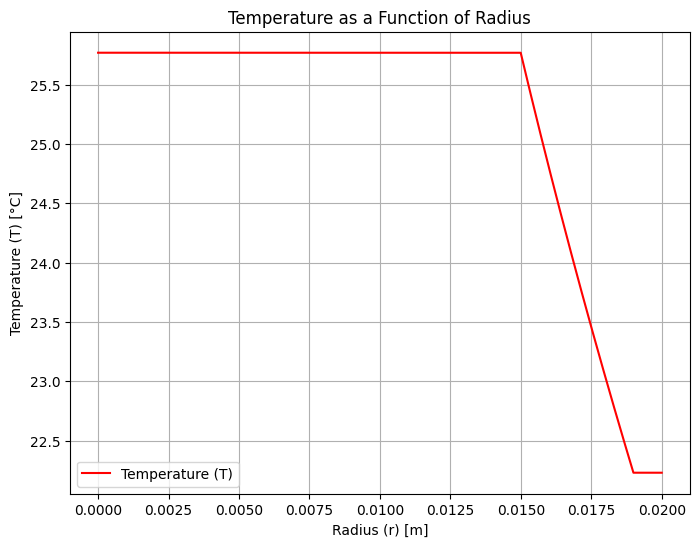

Figure saved as Figure/heat_map_temperature.png


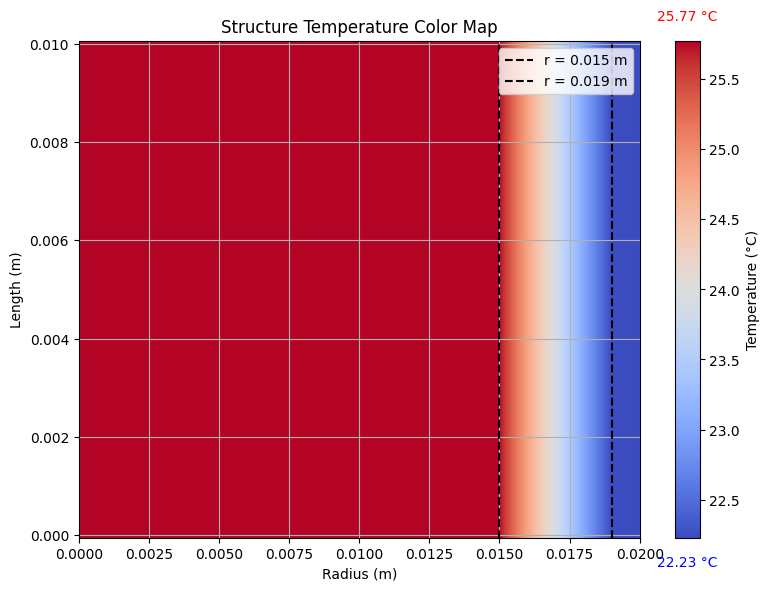

In [9]:
# Plot usefull figures:
# Call the function to plot the temperature vs. radius and save the figure
plot_temperature_vs_radius(r, T, save_path="Figure/temperature_vs_radius.png")
plot_temperature_map(r, T)